In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime

datas = pd.read_csv('s2e-bat-data.txt')
datas['_dt'] = datas['_dt'].apply(lambda ts: datetime.datetime.fromtimestamp(ts/1000))
datas.set_index("_dt")

#datas['_dt'] = datas['_dt'].apply(lambda ts: datetime.datetime.fromtimestamp(ts/1000).strftime('%H:%M:%S'))


battery  Unnamed: 2
_dt                                         
2021-06-06 16:07:34.010     3974         NaN
2021-06-06 16:08:03.454     3974         NaN
2021-06-06 16:08:34.717     3974         NaN
2021-06-06 16:09:05.614     3974         NaN
2021-06-06 16:09:36.340     3974         NaN
...                          ...         ...
2021-06-07 10:22:33.144     3952         NaN
2021-06-07 10:23:01.965     3952         NaN
2021-06-07 10:23:32.722     3952         NaN
2021-06-07 10:24:03.941     3952         NaN
2021-06-07 10:24:34.577     3952         NaN

[2137 rows x 2 columns]

In [2]:
datas

_dt  battery  Unnamed: 2
0    2021-06-06 16:07:34.010     3974         NaN
1    2021-06-06 16:08:03.454     3974         NaN
2    2021-06-06 16:08:34.717     3974         NaN
3    2021-06-06 16:09:05.614     3974         NaN
4    2021-06-06 16:09:36.340     3974         NaN
...                      ...      ...         ...
2132 2021-06-07 10:22:33.144     3952         NaN
2133 2021-06-07 10:23:01.965     3952         NaN
2134 2021-06-07 10:23:32.722     3952         NaN
2135 2021-06-07 10:24:03.941     3952         NaN
2136 2021-06-07 10:24:34.577     3952         NaN

[2137 rows x 3 columns]

In [5]:
filtered_datas = pd.DataFrame(datas.resample('2H', on="_dt").battery.mean())

In [6]:
y = filtered_datas['battery']

In [35]:
y

_dt
2021-06-06 16:00:00    3973.837104
2021-06-06 18:00:00    3973.502146
2021-06-06 20:00:00    3971.623932
2021-06-06 22:00:00    3969.321888
2021-06-07 00:00:00    3966.017094
2021-06-07 02:00:00    3963.484979
2021-06-07 04:00:00    3960.350427
2021-06-07 06:00:00    3957.948498
2021-06-07 08:00:00    3955.452991
2021-06-07 10:00:00    3953.166667
Freq: 2H, Name: battery, dtype: float64

In [7]:
x = filtered_datas.index

In [39]:
x

DatetimeIndex(['2021-06-06 16:00:00', '2021-06-06 18:00:00',
               '2021-06-06 20:00:00', '2021-06-06 22:00:00',
               '2021-06-07 00:00:00', '2021-06-07 02:00:00',
               '2021-06-07 04:00:00', '2021-06-07 06:00:00',
               '2021-06-07 08:00:00', '2021-06-07 10:00:00'],
              dtype='datetime64[ns]', name='_dt', freq='2H')

In [8]:
x.apply(lambda ts: strftime('%H:%M:%S'))

AttributeError: 'DatetimeIndex' object has no attribute 'apply'

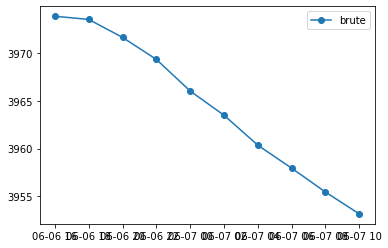

In [40]:
plt.figure()

plt.plot(x,y,label='brute',marker='o')
plt.legend()

plt.show()